In [1]:
import datetime, os

import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
from tensorflow.keras.callbacks import Callback

import tensorflow as tf

In [2]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

Defaulting to user installation because normal site-packages is not writeable


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file a

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.cm as cm

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_csv("Own_Dataset.csv")
data

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0
...,...,...
45213,fuck you for making me cry so much yet pretend...,1
45214,holy shit amp amp amp this guy friends with wa...,1
45215,just want to lay down and cry sick of asking f...,1
45216,finals are coming and not psychologically read...,1


In [5]:
data.shape

(45218, 2)

In [6]:
print("Total Reviews:",len(data),
      "\nTotal Positive or Not Depression Reviews:",len(data[data.label ==0]),
      "\nTotal Negative or Depression Reviews:",len(data[data.label==1]))

Total Reviews: 45218 
Total Positive or Not Depression Reviews: 26335 
Total Negative or Depression Reviews: 18883


(array([0, 1]), [Text(0, 0, '0'), Text(0, 1, '1')])

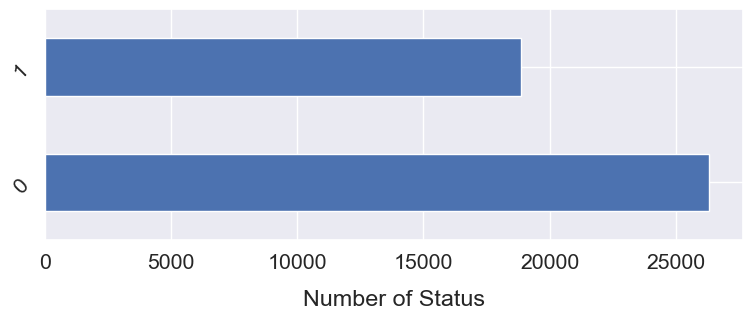

In [7]:
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Status", labelpad=12)
plt.yticks(rotation = 45)

In [8]:
SEED = 548
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.0005
data_path = "Own_Dataset.csv"

In [9]:
def set_seed(seed):
    tf.random.set_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(SEED)

In [10]:
def plot_history_acc_loss(history):
    epochs = range(len(history.history['loss']))
    fig, ax = plt.subplots(1,2,figsize=(14,7))
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
                 fontname='monospace',color=colors_dark[0],y=1,x=0.28,alpha=0.8)

    sns.despine()
    ax[0].plot(epochs, train_acc, color=colors_green[1],
               label = 'Training Accuracy')
    ax[0].plot(epochs, val_acc, color=colors_red[1],
               label = 'Validation Accuracy')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    sns.despine()
    ax[1].plot(epochs, train_loss, color=colors_green[1],
               label ='Training Loss')
    ax[1].plot(epochs, val_loss, color=colors_red[1],
               label = 'Validation Loss')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Loss')

    fig.show()

In [11]:
def plot_history_precision_recall(history):
    epochs = range(len(history.history['loss']))
    fig, ax = plt.subplots(1,2,figsize=(14,7))
    train_acc = history.history['precision']
    train_loss = history.history['recall']
    val_acc = history.history['val_precision']
    val_loss = history.history['val_recall']

    fig.text(s='Epochs vs. Training and Validation Precision/Recall',size=18,fontweight='bold',
                 fontname='monospace',color=colors_dark[0],y=1,x=0.28,alpha=0.8)

    sns.despine()
    ax[0].plot(epochs, train_acc, color=colors_green[1],
               label = 'Training Precision')
    ax[0].plot(epochs, val_acc, color=colors_yellow[1],
               label = 'Validation Precision')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Training & Validation Precision')

    sns.despine()
    ax[1].plot(epochs, train_loss, color=colors_green[1],
               label ='Training Recall')
    ax[1].plot(epochs, val_loss, color=colors_yellow[1],
               label = 'Validation Recall')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Recall')

    fig.show()

In [12]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (12, 12), fontsize=14):
    group_counts = ["{0:0.0f}".format(value) for value in
                    confusion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix.flatten() / np.sum(confusion_matrix)]

    labels = [f"{v2}\n{v3}" for v2, v3 in
              zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(class_names), len(class_names))

    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')

    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

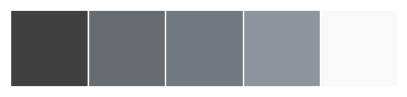

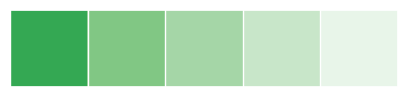

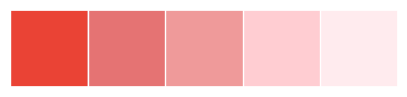

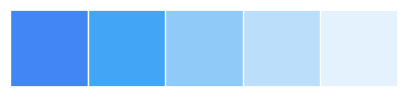

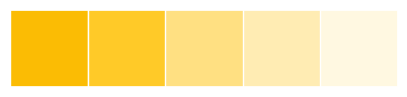

In [13]:
colors_dark = ["#404040", "#676c72", '#737980', '#8e959e', '#f9f9f9']
colors_red = ["#EA4335", "#E57373", '#EF9A9A', '#FFCDD2', '#FFEBEE']
colors_green = ['#34A853','#81C784','#A5D6A7','#C8E6C9','#E8F5E9']
colors_blue = ['#4285F4','#42A5F5','#90CAF9','#BBDEFB','#E3F2FD']
colors_yellow = ['#FBBC04','#FFCA28','#FFE082','#FFECB3','#FFF8E1']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_blue)
sns.palplot(colors_yellow)

In [14]:
train_ds = pd.read_csv("Own_Dataset.csv")
train_ds.head()

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0


In [15]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45218 non-null  object
 1   label    45218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.7+ KB


In [16]:
train_ds = train_ds.reset_index()
label_encoder = preprocessing.LabelEncoder()

In [17]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    45218 non-null  int64 
 1   message  45218 non-null  object
 2   label    45218 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
train_ds['label']= label_encoder.fit_transform(train_ds['label']) 

In [20]:
vocab_size = 23196
embedding_dim = 32
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [21]:
sentences = []
labels = []

training_messages = []
training_labels = []

for index, item in train_ds.iterrows():
  message, label = item["message"], item["label"]
  training_messages.append(str(message))
  training_labels.append(label)

In [22]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_messages)
word_index = tokenizer.word_index

In [23]:
print(len(word_index))

70374


In [24]:
training_messages = tokenizer.texts_to_sequences(training_messages)

training_padded = pad_sequences(training_messages,
                                maxlen=max_length, 
                                truncating=trunc_type, 
                                padding=padding_type
                               )

In [25]:
training_padded = np.array(training_padded)
training_labels_final = np.array(training_labels)

In [26]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, verbose=1, mode='max',
)


model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           742272    
                                                                 
 bidirectional (Bidirection  (None, 24)                4320      
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 746617 (2.85 MB)
Trainable params: 746617 (2.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
num_epochs = 300
batch_size= 128

In [29]:
history = model.fit(training_padded, training_labels_final, epochs = num_epochs, batch_size = batch_size, callbacks=[ es, model_checkpoint], validation_split=0.2)

Epoch 1/300


283/283 [==============================] - 19s 51ms/step - loss: 0.3663 - accuracy: 0.8490 - precision: 0.9699 - recall: 0.5701 - val_loss: 0.5054 - val_accuracy: 0.7448 - val_precision: 0.9884 - val_recall: 0.6624
Epoch 2/300
  3/283 [..............................] - ETA: 11s - loss: 0.2412 - accuracy: 0.9167 - precision: 0.9561 - recall: 0.8015

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


283/283 [==============================] - 13s 46ms/step - loss: 0.1791 - accuracy: 0.9351 - precision: 0.9584 - recall: 0.8441 - val_loss: 0.3643 - val_accuracy: 0.8228 - val_precision: 0.9885 - val_recall: 0.7691
Epoch 3/300
283/283 [==============================] - 14s 49ms/step - loss: 0.1368 - accuracy: 0.9492 - precision: 0.9433 - recall: 0.9036 - val_loss: 0.3566 - val_accuracy: 0.8396 - val_precision: 0.9881 - val_recall: 0.7924
Epoch 4/300
283/283 [==============================] - 15s 52ms/step - loss: 0.1190 - accuracy: 0.9559 - precision: 0.9421 - recall: 0.9262 - val_loss: 0.2761 - val_accuracy: 0.8805 - val_precision: 0.9868 - val_recall: 0.8496
Epoch 5/300
283/283 [==============================] - 14s 51ms/step - loss: 0.1068 - accuracy: 0.9596 - precision: 0.9418 - recall: 0.9383 - val_loss: 0.2888 - val_accuracy: 0.8725 - val_precision: 0.9875 - val_recall: 0.8381
Epoch 6/300
283/283 [==============================] - 15s 52ms/step - loss: 0.0979 - accuracy: 0.9619 -

C:\Users\User\AppData\Local\Temp\ipykernel_11256\4255163538.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


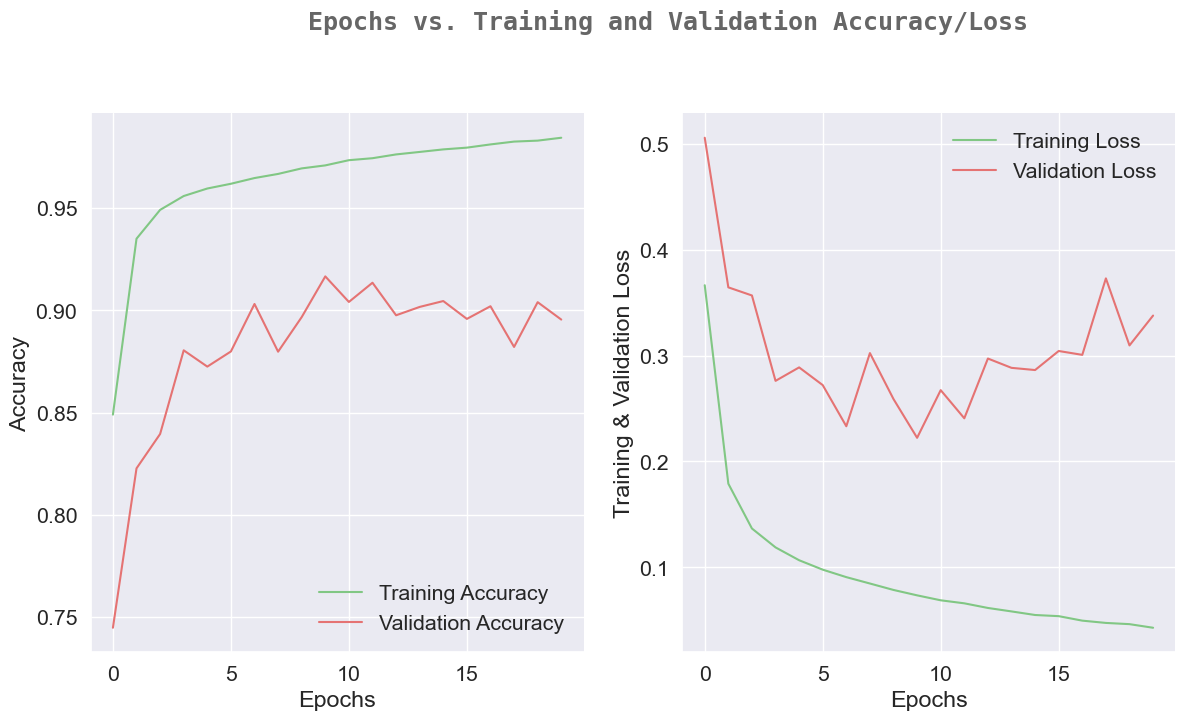

In [30]:
plot_history_acc_loss(history)

C:\Users\User\AppData\Local\Temp\ipykernel_11256\1702371119.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


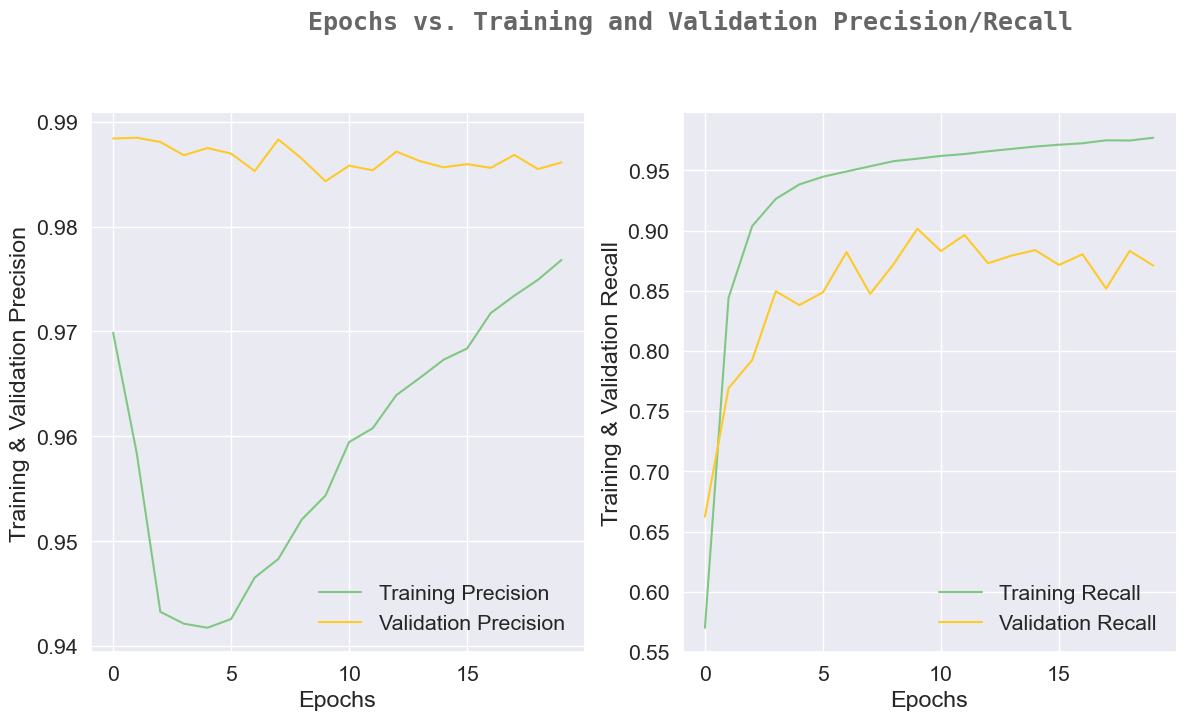

In [31]:
plot_history_precision_recall(history)

1414/1414 [==============================] - 12s 8ms/step


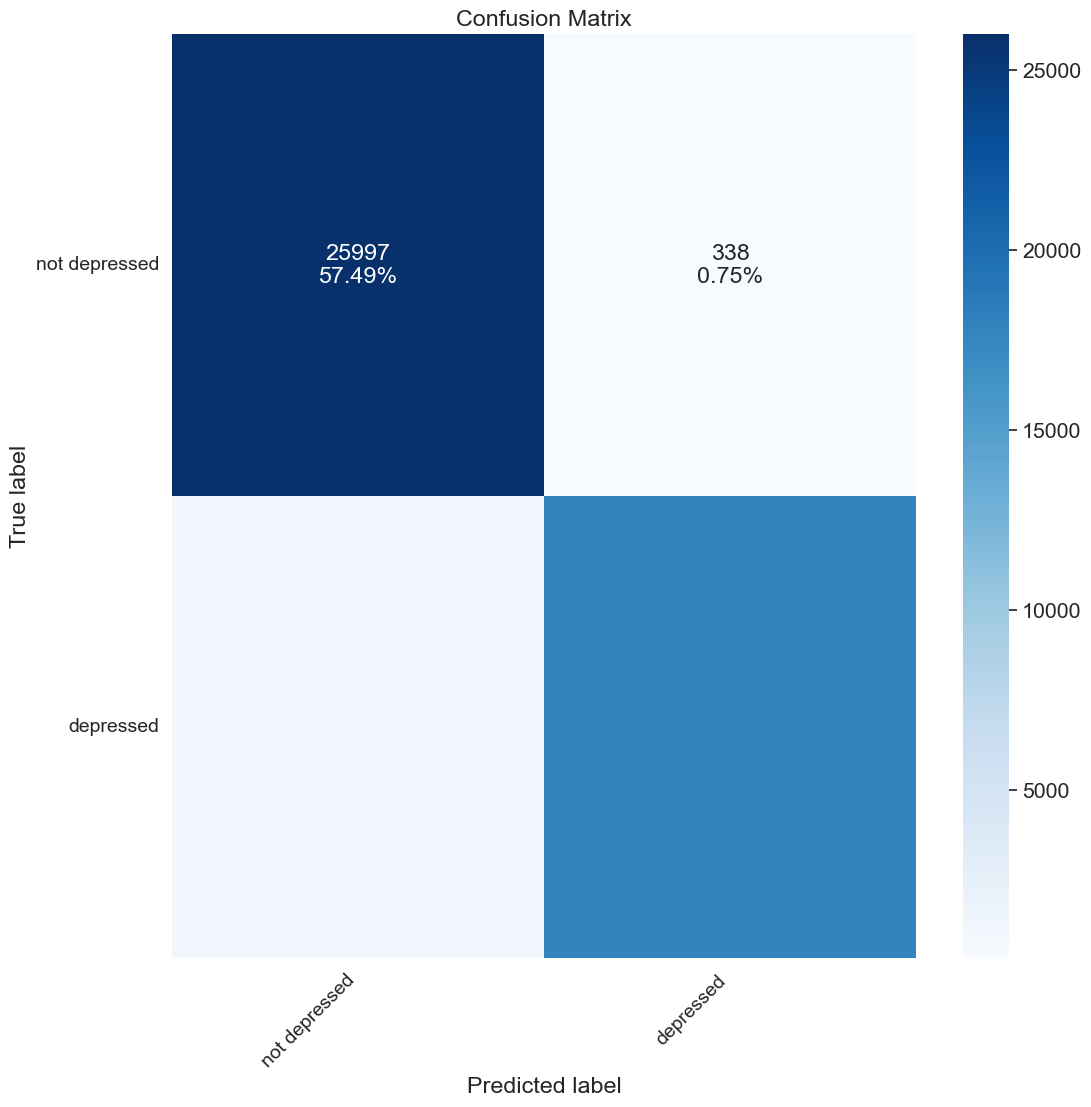

In [32]:
classes = ['not depressed','depressed']
test_predictions = model.predict(training_padded)
ground_truth_class_ids = training_labels_final

# take the argmax for each set of prediction scores
# to return the class id of the highest confidence prediction
top_pred_ids = test_predictions.round()
conf_mat = confusion_matrix(ground_truth_class_ids, top_pred_ids)
figure = print_confusion_matrix(conf_mat, classes)
plt.title('Confusion Matrix')
plt.show()